# Analise de Acidentes

    Copyright (C) 2019 - Luis Vitório
    Analise de Acidentes de Trânsito

    Este programa é um software livre: você pode redistribuí-lo e/ou
    modificá-lo sob os termos da Licença Pública Geral Affero GNU,
    conforme publicado pela Free Software Foundation, seja a versão 3
    da Licença ou (a seu critério) qualquer versão posterior.

    Este programa é distribuído na esperança de que seja útil,
    mas SEM QUALQUER GARANTIA; sem a garantia implícita de
    COMERCIALIZAÇÃO OU ADEQUAÇÃO A UM DETERMINADO PROPÓSITO. Veja a
    Licença Pública Geral Affero GNU para obter mais detalhes.

    Você deve ter recebido uma cópia da Licença Pública Geral Affero GNU
    junto com este programa. Se não, veja <https://www.gnu.org/licenses/>.

    linkedin: https://www.linkedin.com/in/vitorioluis/
    email: vitorioluis@gmail.com

#### Dados obtidos de <https://www.prf.gov.br/portal/dados-abertos/acidentes>

#### Ferramentas utilizadas para realizar o Data Analytics
<img src="./img/1.png" >

In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline

## Fase 1
#### Importar e tratar os dados

In [2]:
# arquivo por formato
def filtrar_arquivo(tipo):
    path = './'
    lst_arq = os.listdir(path) # listando novamente o diretório para verificar arquivos csv
    return [arq for arq in lst_arq if arq[-3:] == tipo]

# Separa arquivo zip caso haja outros tipos de arquivo na pasta
lst_zip = filtrar_arquivo('zip')

# extrair arquivos do zip para trabalhar
for zp in lst_zip:
    fzp = zipfile.ZipFile(zp)
    fzp.extractall('./') 
    fzp.close()

# Separa arquivo csv caso haja outros tipos de arquivo no diretório
lst_csv = filtrar_arquivo('csv')

# criar dataframe vazio para unir as bases
df_acidentes = pd.DataFrame()

# É hora de ler os arquivos csv e consolidar no dataframe
for csv in lst_csv:
    print(csv)
    df = pd.read_csv(csv, sep=';', encoding='latin1')
    df_acidentes = df_acidentes.append(df)
    os.remove(csv)

acidentes2017_todas_causas_tipos.csv
acidentes2018_todas_causas_tipos.csv
acidentes2019_todas_causas_tipos.csv


In [3]:
# verificar se está tudo ok
df_acidentes.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,8.0,1.0,2017-01-01,domingo,00:00:00,PR,376.0,112,PARANAVAI ...,Sim,...,Masculino,0,0,1,0,-23.0988,-52.3879,SR-PR,DEL7/7,UOP05/PR
1,9.0,955.0,2017-01-01,domingo,00:01:00,SC,101.0,234,PALHOCA ...,Sim,...,Masculino,1,0,0,0,-27.8101,-48.6357,SR-SC,DEL8/1,UOP02/SC
2,11.0,2.0,2017-01-01,domingo,00:00:00,PR,153.0,"56,9",SANTO ANTONIO DA PLATINA ...,Sim,...,Feminino,0,1,0,0,-23.3695,309.935,SR-PR,DEL7/7,UOP07/PR
3,11.0,3.0,2017-01-01,domingo,00:00:00,PR,153.0,"56,9",SANTO ANTONIO DA PLATINA ...,Sim,...,Masculino,0,1,0,0,-23.3695,309.935,SR-PR,DEL7/7,UOP07/PR
4,12.0,1499.0,2017-01-01,domingo,00:00:00,GO,153.0,435,ANAPOLIS ...,Sim,...,Masculino,0,0,1,0,-16.2747,-48.9691,SR-GO,DEL1/2,UOP01/GO


In [4]:
# quantidades de linhas e colunas
df_acidentes.shape

(684974, 37)

##### Nosso conjunto de dados contém 270.912 linhas divididas em 37 colunas

In [5]:
# nome das colunas
df_acidentes.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [6]:
# informações sobre tipos de campos, e dados faltantes
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684974 entries, 0 to 155938
Data columns (total 37 columns):
id                        684974 non-null float64
pesid                     647978 non-null float64
data_inversa              684974 non-null object
dia_semana                684974 non-null object
horario                   684974 non-null object
uf                        684974 non-null object
br                        683880 non-null float64
km                        683880 non-null object
municipio                 684974 non-null object
causa_principal           684974 non-null object
causa_acidente            684974 non-null object
ordem_tipo_acidente       684879 non-null float64
tipo_acidente             684879 non-null object
classificacao_acidente    684974 non-null object
fase_dia                  684974 non-null object
sentido_via               684974 non-null object
condicao_metereologica    684974 non-null object
tipo_pista                684974 non-null object
tra

In [7]:
df_acidentes.tail()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
155934,223575.0,NaN,2019-04-15,segunda-feira,12:25:00,ES,101.0,211,IBIRACU,Sim,...,Não Informado,0,0,0,0,"-19,80700903","-40,36767233",SR-ES,DEL12/2,UOP01/ES
155935,223575.0,NaN,2019-04-15,segunda-feira,12:25:00,ES,101.0,211,IBIRACU,Sim,...,Não Informado,0,0,0,0,"-19,80700903","-40,36767233",SR-ES,DEL12/2,UOP01/ES
155936,223575.0,NaN,2019-04-15,segunda-feira,12:25:00,ES,101.0,211,IBIRACU,Sim,...,Não Informado,0,0,0,0,"-19,80700903","-40,36767233",SR-ES,DEL12/2,UOP01/ES
155937,223575.0,NaN,2019-04-15,segunda-feira,12:25:00,ES,101.0,211,IBIRACU,Sim,...,Não Informado,0,0,0,0,"-19,80700903","-40,36767233",SR-ES,DEL12/2,UOP01/ES
155938,223575.0,NaN,2019-04-15,segunda-feira,12:25:00,ES,101.0,211,IBIRACU,Sim,...,Não Informado,0,0,0,0,"-19,80700903","-40,36767233",SR-ES,DEL12/2,UOP01/ES


In [8]:
# plot de calor adaptado para verificar dados faltantes em amarelo
def grafico_dados_faltantes():
    plt.figure(figsize=(15,10))
    return sns.heatmap(df_acidentes.isnull(), yticklabels=False, cbar=False, cmap='viridis');

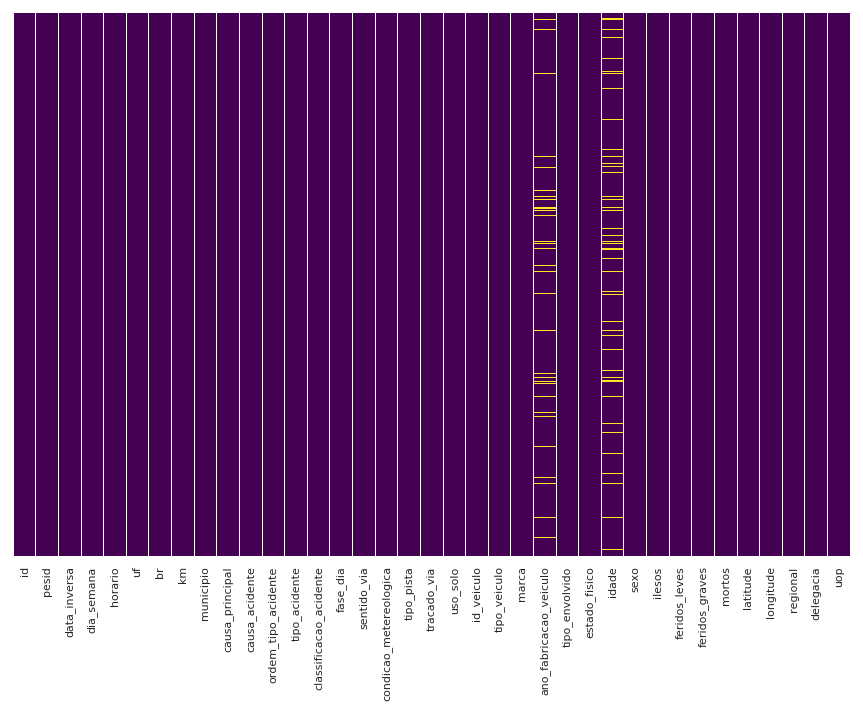

In [9]:
grafico_dados_faltantes();

##### No gráfico acima podemos observar os dados faltantes em amarelo, apenas 4 colunas contém dados faltantes:
#####   * "br" => Nome da rodovia
#####   * "km" => kilômetro onde aconteceu o acident 
#####   * "idade" => idade do contutor do veículo
#####   * "ano_fabricacao_veiculo" => como o próprio nome ja diz ano de fabricação do veículo

In [3]:
def faixa_etaria(idade):
    if idade <= 10:
        _faixa = '00-10'
    elif idade <= 20:
        _faixa = '11-20'    
    elif idade <= 30:
        _faixa = '21-30'
    elif idade <= 40:
        _faixa = '31-40'
    elif idade <= 50:
        _faixa = '41-50'
    elif idade <= 60:
        _faixa = '51-60'
    elif idade <= 70:
        _faixa = '61-70'
    else:
        _faixa = '70+'
    return _faixa

In [12]:
# Aplica a média de idade para preencher os dados faltandes da coluna "idade"
df_acidentes['idade'].fillna((df_acidentes['idade'].mean(skipna=True)),inplace=True)

# gerar a média do ano de fabricação
ano_medio_fabricacao = int(df_acidentes['ano_fabricacao_veiculo'].mean())

# tratando o ano médio de fabricação do veículo
df_acidentes['ano_fabricacao_veiculo'].fillna((ano_medio_fabricacao), inplace=True);

# tratando o campo 'br' que não estão preenchidas
# subistitui o Nulo por Zero(0)
df_acidentes['br'] = df_acidentes['br'].fillna(0) 

# converte em inteiro para remover casa decimal
df_acidentes['br'] = df_acidentes['br'].astype(int)

# converte em str
df_acidentes['br'] = df_acidentes['br'].astype(str) 

# preenche os campos de valores Zero(0) 
df_acidentes.loc[df_acidentes['br'] == '0','br'] = 'Nome da BR não preenchido' 

# normalizando dados(coluna br com o tamanho de 3 caracteres)
df_acidentes['br'] = df_acidentes['br'].apply(lambda n: '0' * (3 - len(n)) + n if len(n) < 3 else n); 

# converte em str e substitui ',' por '.' para em seguida converter em float
df_acidentes['km']=df_acidentes['km'].apply(lambda x: str(x).replace(".","").replace(",","."))

# converte em float
df_acidentes['km'] = df_acidentes['km'].astype(float)

# aplica a média do km nos campos vazios
df_acidentes['km'].fillna((df_acidentes['km'].mean(skipna=True)),inplace=True)

# criando grupos de faixa etária
df_acidentes['faixa_etaria']=df_acidentes['idade'].apply(faixa_etaria)

# criar coluna ano
df_acidentes['ano']=df_acidentes['data_inversa'].apply(lambda x: x[0:4])

# criar coluna mes
df_acidentes['mes']=df_acidentes['data_inversa'].apply(lambda x: x[5:7])

# Vamos resolver isso aplicando um strip na coluna
for c in ('tipo_veiculo','causa_acidente','condicao_metereologica','fase_dia','tipo_pista', 'sexo'):
    df_acidentes[c] = df_acidentes[c].apply(lambda x : str(x).strip());
    

# Consertando problemas de idade
mm = df_acidentes[df_acidentes['idade'] < 100]['idade'].mean()
df_acidentes.loc[df_acidentes.idade > 100,'idade'] = mm

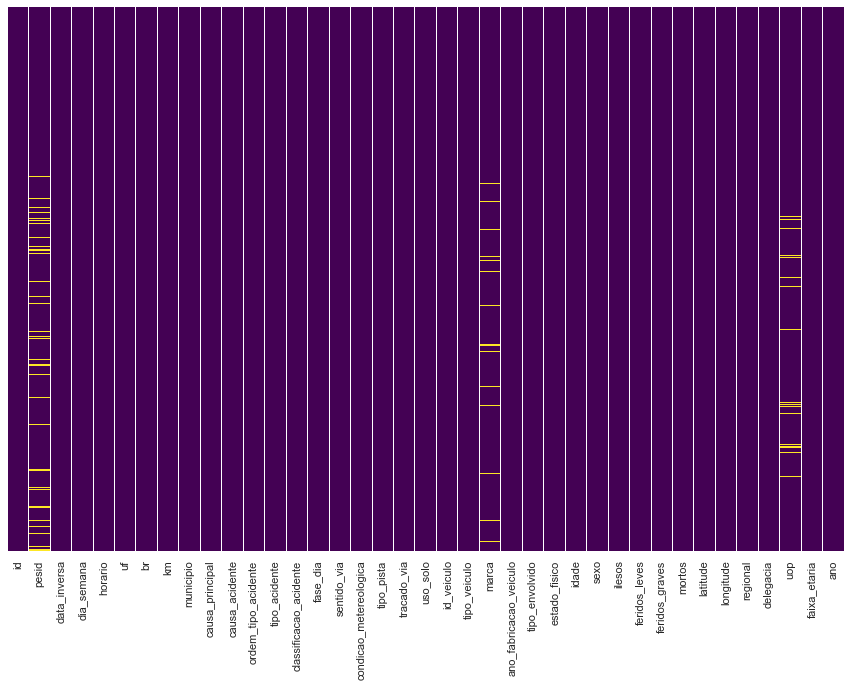

In [12]:
grafico_dados_faltantes();

#### Agora que normalizamos nossos dados e não temos dados faltantes como podemos observar no gráfico, seguiremos para próxima fase.

## Fase 2

### Conhecer/Explorar os dados

##### Para não precisar toda hora ficar digitando a mesma coisa em graficos uma função básica para gerar gráfico 

In [14]:
# total de linha que contém no dataframe
ncount = len(df_acidentes)

In [58]:
# função para gerar gráfico padrão
def gerar_grafico_padrao(campo, largura=10, altura=14, df = df_acidentes,titulo='Acidentes'):
    
    ax = df[campo].value_counts().plot(kind='barh', figsize=(largura, altura), fontsize=13, );
    ax.set_alpha(0.8)
    ax.set_xlabel('Números de Acidentes')
    ax.set_title(titulo)
    ax.set_xticks(np.arange(0, 110, 10)*len(df)/100)
    totals = []

    # encontrar os valores e acrescentar à lista
    for i in ax.patches:
        totals.append(i.get_width())
    
    # definir barras individuais usando a lista acima
    total = sum(totals)

    # definir barras individuais usando a lista acima
    for i in ax.patches:
        ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=12, color='dimgrey')

    # invertido para maior no topo
    ax.invert_yaxis()

    return ax    


#### Vamos verificar as medidas de tendência central da variável IDADE.


d:\__venvs_projects\deep_learn\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
d:\__venvs_projects\deep_learn\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


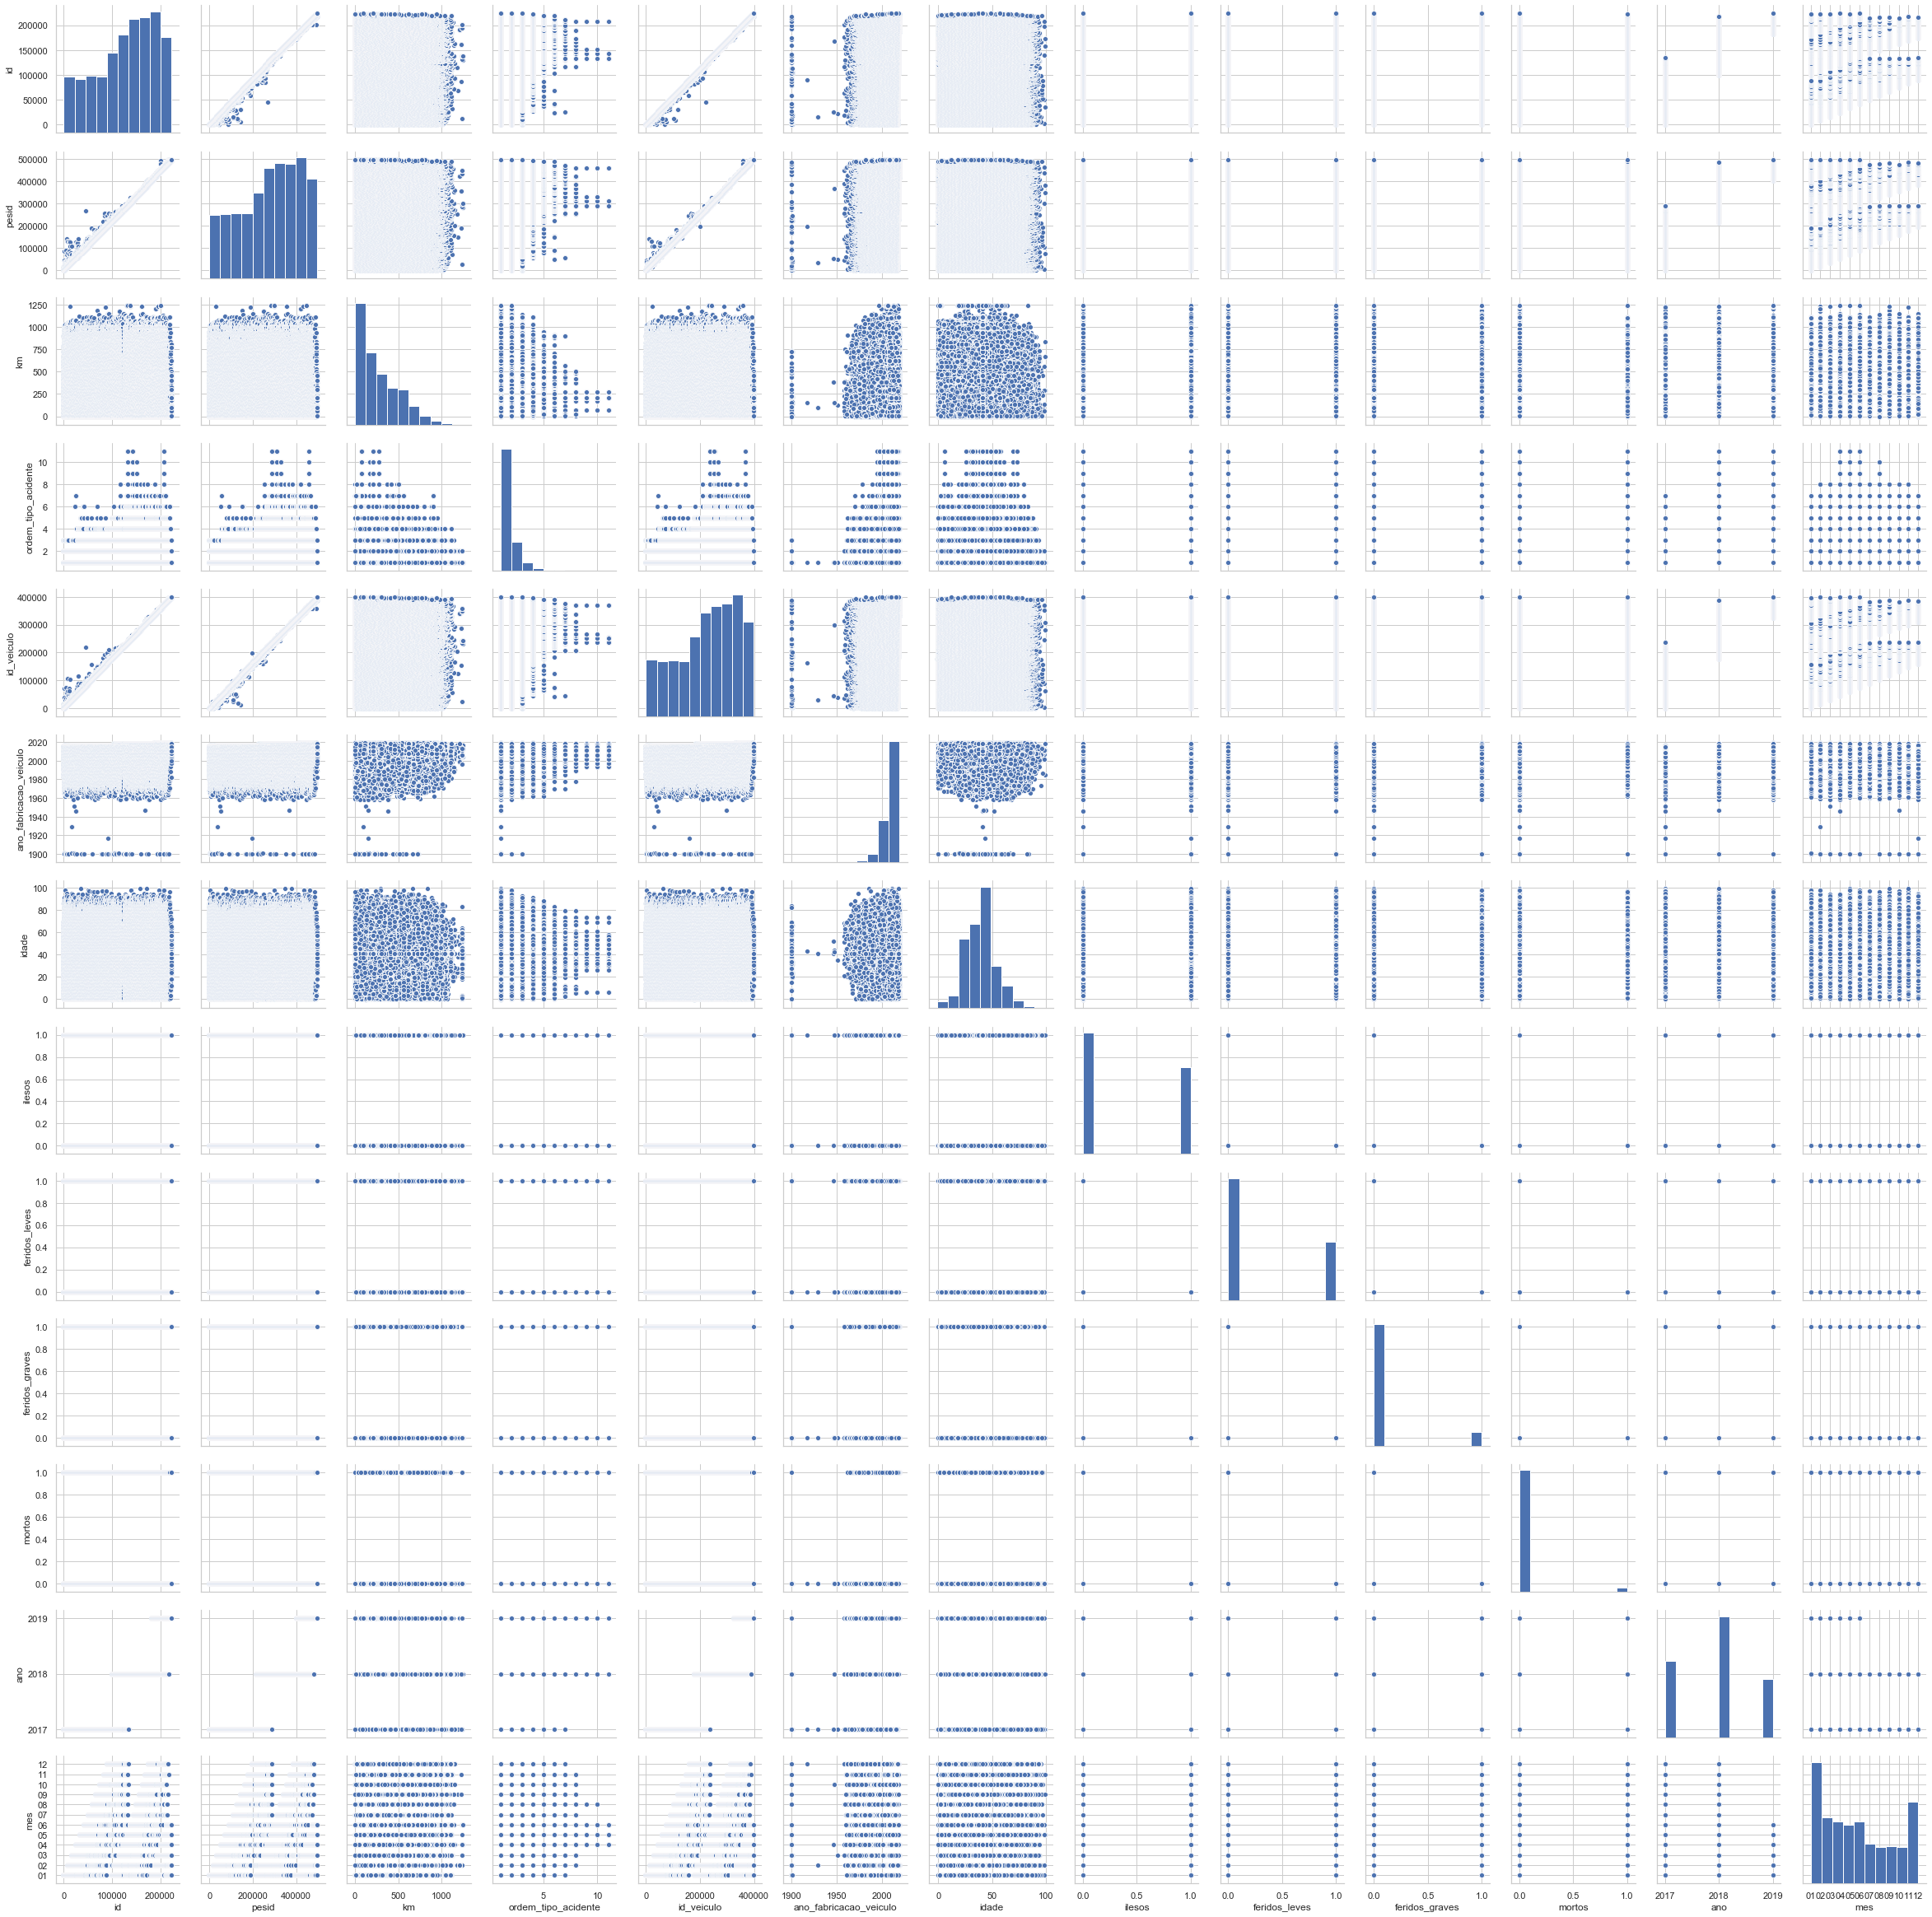

In [159]:
sns.pairplot(df_acidentes);

In [45]:
sd = df_acidentes['idade'].std()
cv = sd / df_acidentes['idade'].mean() * 100

print('Mediana:', df_acidentes['idade'].median())
print('Moda:', df_acidentes.idade.mode())
print('Media:', df_acidentes.idade.mean())
print('Kurtosis:', df_acidentes.idade.kurtosis())
print('Skewness:', df_acidentes.idade.skew())
print('Assimetria:', df_acidentes['idade'].max() - df_acidentes['idade'].min())
print('Variança:',df_acidentes['idade'].var())
print('Coeficiente de Variação:', cv)

Mediana: 40.0
Moda: 0    40.939089
dtype: float64
Media: 38.39817584109583
Kurtosis: 0.4735551845227919
Skewness: 0.25539957931381085
Assimetria: 100.0
Variança: 192.18097409758
Coeficiente de Variação: 36.103108960334495


In [48]:
df_acidentes.idade.describe()

count    684974.000000
mean         38.398176
std          13.862935
min          -1.000000
25%          29.000000
50%          40.000000
75%          45.000000
max          99.000000
Name: idade, dtype: float64

#### Agora que já temos as medidas de tendência central da variável idade podemos verificar no histograma a qual curtose ela se classifica.

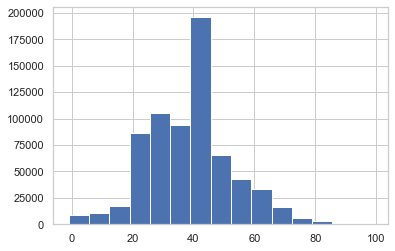

In [47]:
df_acidentes['idade'].hist(bins=15);

#### Nesse histograma podemos observar uma assimetria do tipo Leptocúrtica, ou seja, uma faixa de idade de 20 a +/- 45 anos com maior número de casos de acidentes.

In [34]:
df_acidentes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,684974.0,129029.371910,60533.195119,8.0,84989.25,138888.0,179931.00,223575.0
pesid,647978.0,279521.121194,136022.867174,1.0,174333.50,297238.0,395233.00,496917.0
km,684974.0,273.195777,231.254544,0.0,81.10,210.6,430.00,1242.4
ordem_tipo_acidente,684879.0,1.356513,0.752147,1.0,1.00,1.0,1.00,11.0
id_veiculo,684970.0,229563.623021,108032.035576,4.0,151310.00,245735.0,321083.75,399300.0
ano_fabricacao_veiculo,684974.0,2008.559058,7.303421,1900.0,2006.00,2010.0,2013.00,2019.0
idade,684974.0,38.398176,13.862935,-1.0,29.00,40.0,45.00,99.0
ilesos,684974.0,0.417944,0.493221,0.0,0.00,0.0,1.00,1.0
feridos_leves,684974.0,0.322631,0.467483,0.0,0.00,0.0,1.00,1.0
feridos_graves,684974.0,0.101218,0.301618,0.0,0.00,0.0,0.00,1.0


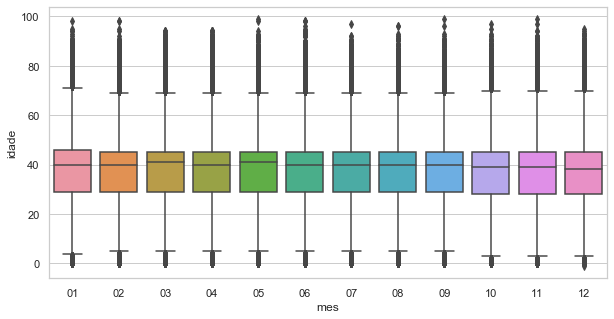

In [120]:
plt.figure(figsize=(10,5))
sns.boxplot(x="mes", y="idade", data=df_acidentes);

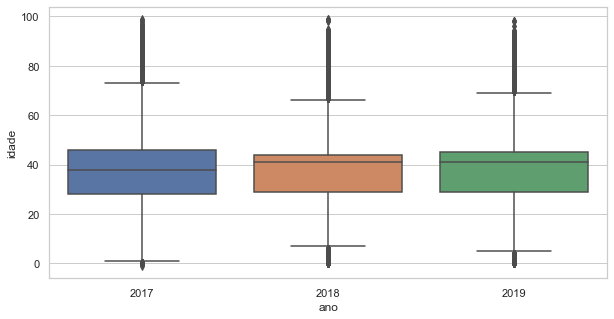

In [49]:
#sns.scatterplot(y='idade',x='sexo',data=df_acidentes);
plt.figure(figsize=(10,5))
sns.boxplot(x="ano", y="idade", data=df_acidentes);

#### Nesse boxplot podemos observar uma pequena variação da média geral onde 2017 fica abaixo dos 40 e 2018-19 acima.

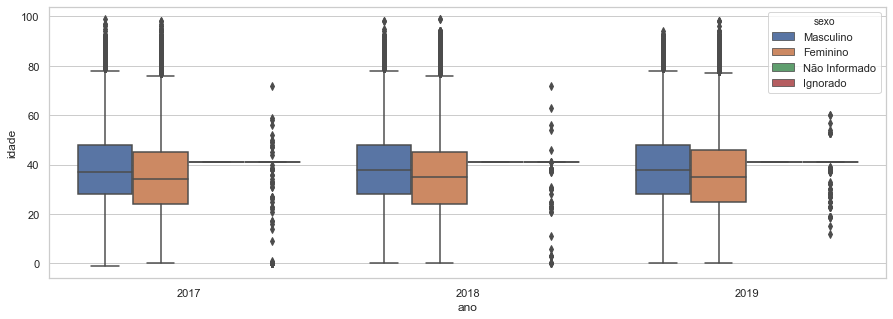

In [111]:
plt.figure(figsize=(15,5))
sns.boxplot(x="ano", y="idade",hue='sexo', data=df_acidentes);

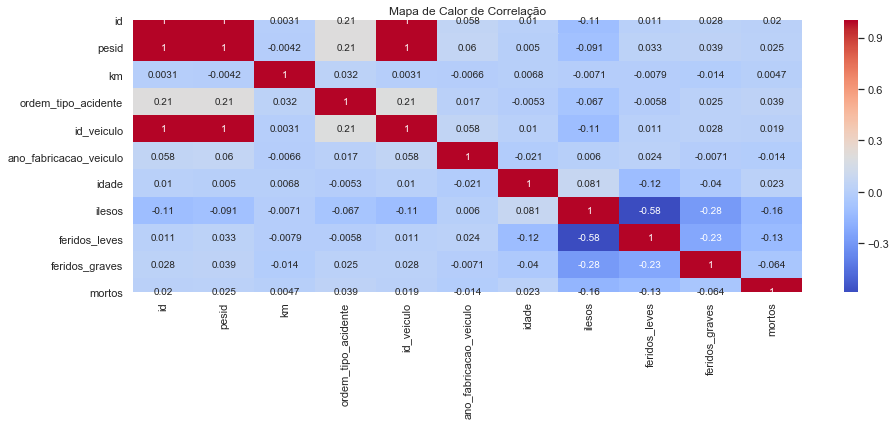

In [60]:
# correlação entre todas as variáveis do nosso dataframe.
plt.figure(figsize=(15,5))
sns.heatmap(df_acidentes.corr(), cmap='coolwarm', annot=True)
plt.title('Mapa de Calor de Correlação');

### Nesta etapa da nossa analise vamos conhecer bem que temos em nossa base de dados, vamos gerar uma série de gráficos buscando por insights.

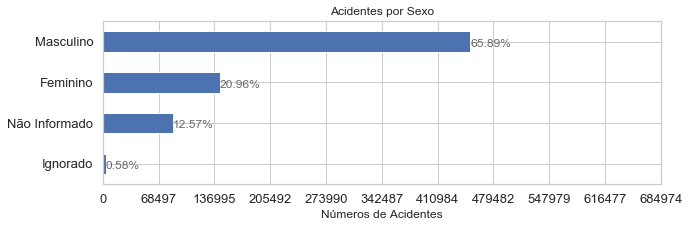

In [28]:
# acidentes por sexo
gerar_grafico_padrao('sexo', altura=3, titulo="Acidentes por Sexo");

### Tem imagens que 'fala' mais que mil palavras, esse gráfico é um dessas imagem. Os acidentes ocorrido com homens ao volante é mais de 3 vezes maior que os com mulheres ao volante.

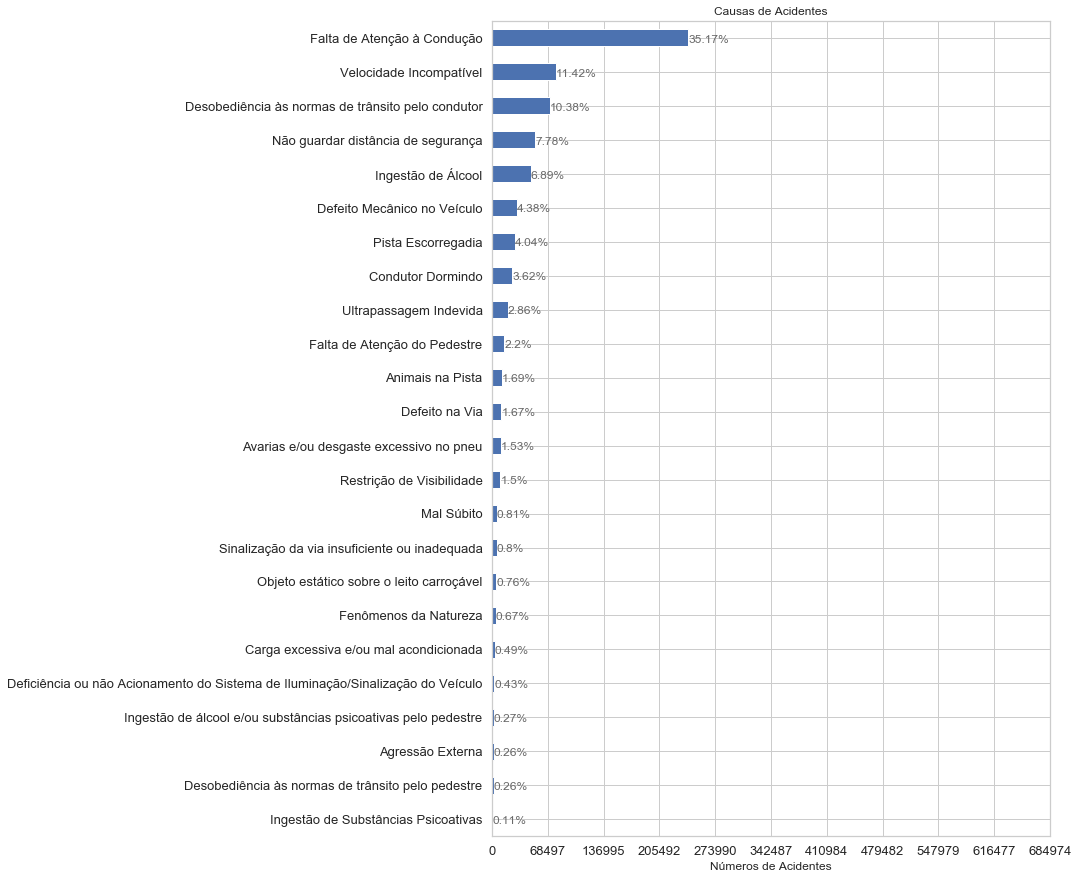

In [29]:
# Gráfico por causa de acidentes.
gerar_grafico_padrao('causa_acidente', altura = 15, largura=10, titulo='Causas de Acidentes');

### Neste gráfico a categoria "Falta de atenção à condução" é esmagadora estou até surpreso com tamanha desproporção.

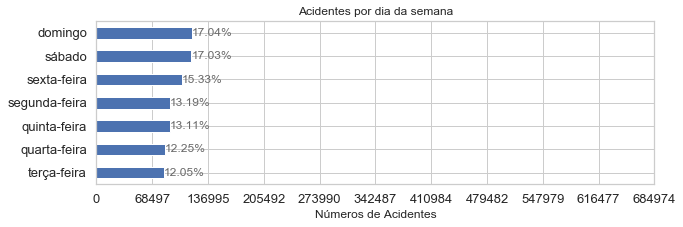

In [30]:
gerar_grafico_padrao('dia_semana', altura=3, largura=10, titulo='Acidentes por dia da semana');

### Podemos ver nesse grafico acima que a maioria dos acidentes ocorrem no fim de semana. Vamos verificar no fim de semana qual é a maior causa de acidentes.

In [56]:
df_fds = df_acidentes[df_acidentes['dia_semana'].isin(['domingo','sábado','sexta-feira'])]
df_fds.dia_semana.unique()

array(['domingo', 'sexta-feira', 'sábado'], dtype=object)

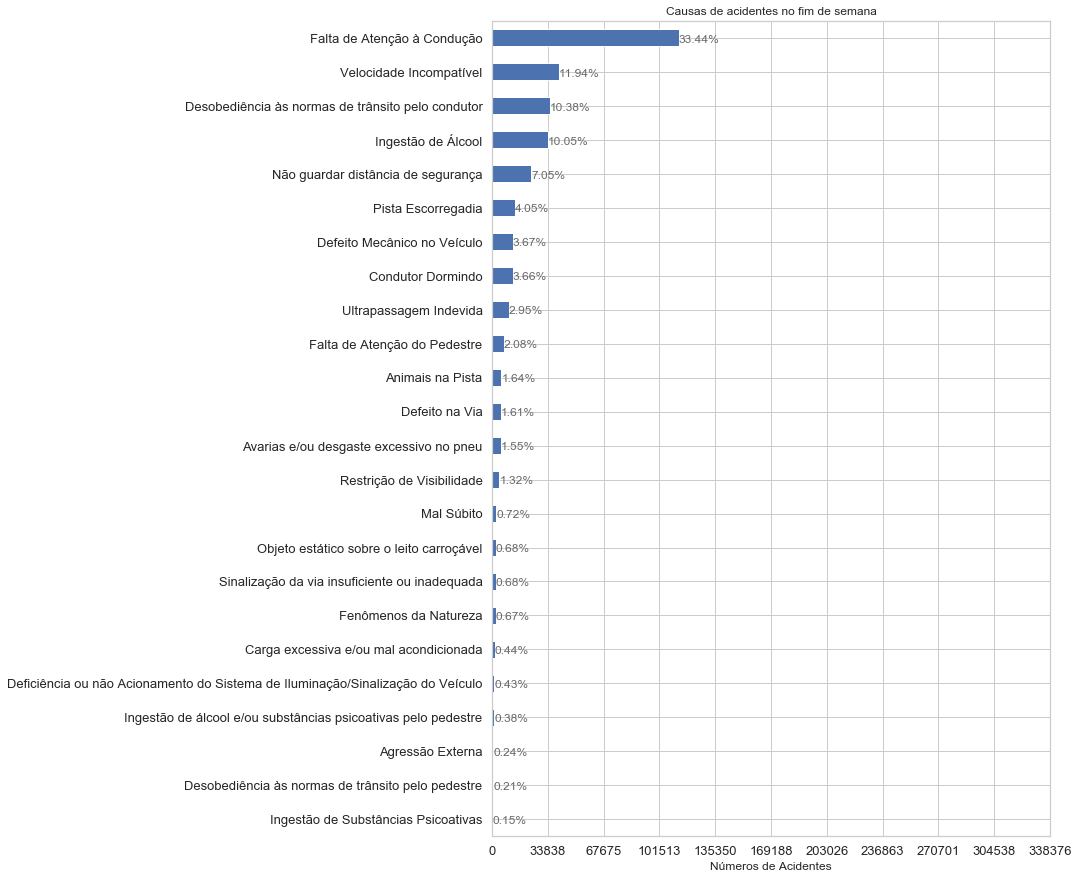

In [61]:
gerar_grafico_padrao('causa_acidente', altura=15, largura=10,df=df_fds, titulo='Causas de acidentes no fim de semana');

### A categoria "Ingestão de Álcool" subiu da quinta para a quarta posição com aumento aproximado de 46%. Isso já era esperado devido ao maior consumo de álcool no  fim de semana.

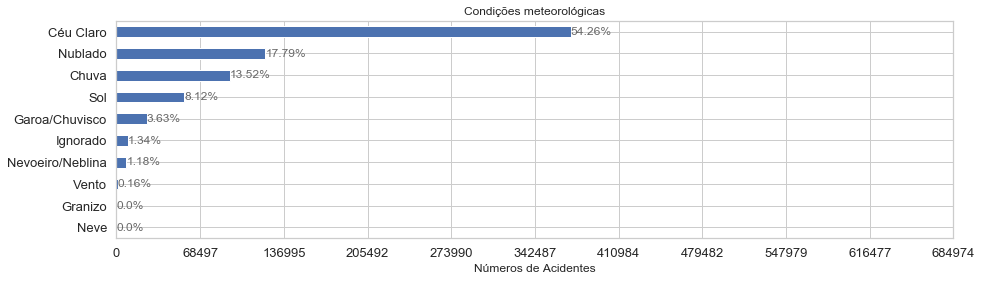

In [31]:
gerar_grafico_padrao('condicao_metereologica', altura=4, largura=15, titulo='Condições meteorológicas');

### Este gráfico acima para mim é uma surpresa, em condições normais o número de acidentes é muito maior do que em condições adiversas.

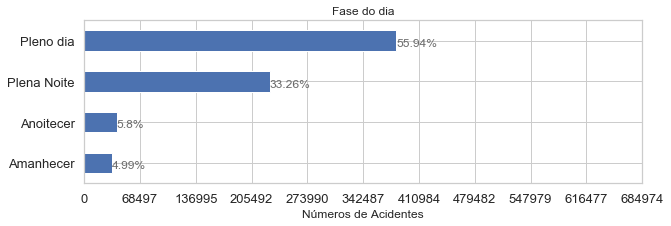

In [32]:
gerar_grafico_padrao('fase_dia', altura = 3, titulo= 'Fase do dia');

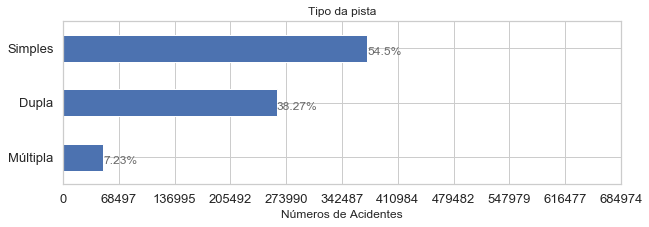

In [33]:
gerar_grafico_padrao('tipo_pista', altura = 3, titulo = 'Tipo da pista');

### Aqui podemos verificar que os tipos de pista estão influenciando no número de acidentes, mas não temos a quantidade de carros que circulou nessas pista para atestar isso.

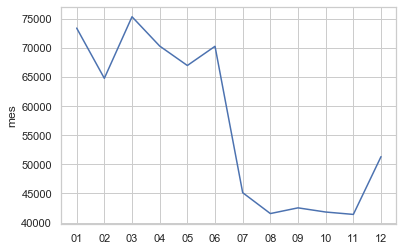

In [121]:
df_ano = pd.DataFrame(df_acidentes['mes'].value_counts())
sns.lineplot(x=df_ano.index, y=df_ano['mes']);

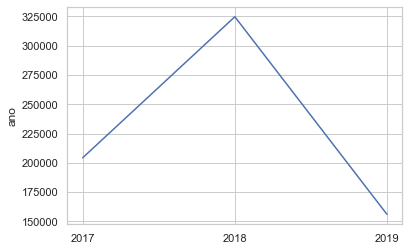

In [108]:
df_ano = pd.DataFrame(df_acidentes['ano'].value_counts())
sns.lineplot(x=df_ano.index, y=df_ano['ano']);

In [142]:
df = pd.DataFrame(df_acidentes.groupby(['mes','causa_acidente'])['mes'].count())
df.head()
#sns.lineplot(x=df.index, y=df['mes'],hue=df['causa_acidente']);



pandas.core.frame.DataFrame

In [158]:
teste = df.mes
teste['mes']

KeyError: 'mes'

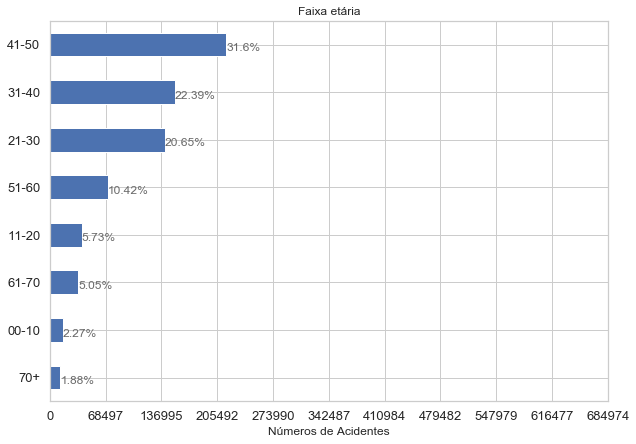

In [36]:
gerar_grafico_padrao('faixa_etaria', altura=7, titulo='Faixa etária');

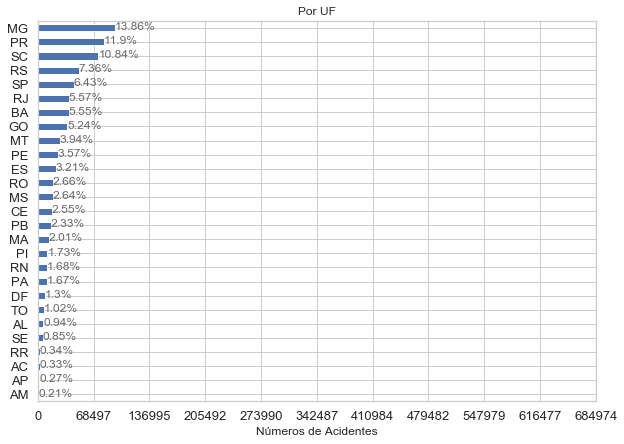

In [37]:
gerar_grafico_padrao('uf', altura=7,titulo='Por UF');

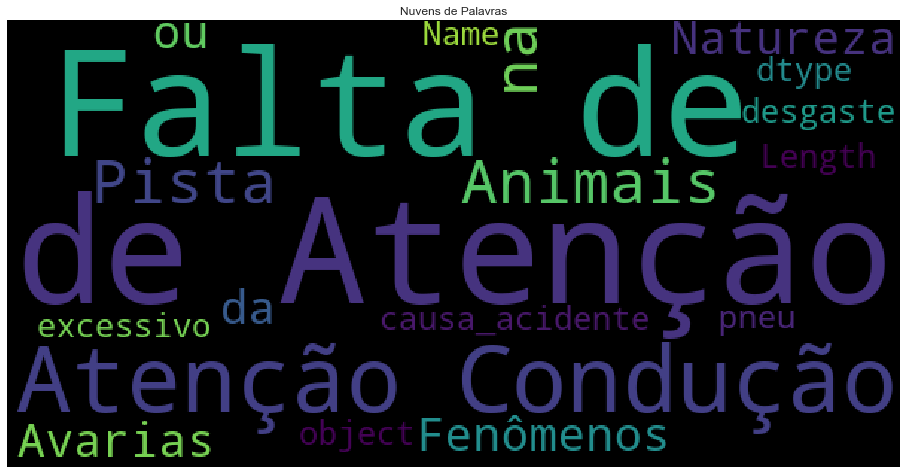

In [31]:
# formando a nuvem de palavras
# WordCloud
from wordcloud import WordCloud

wd = WordCloud(max_font_size=100, width=600, height=300,background_color='black').generate(str(df_acidentes['causa_acidente']))
plt.figure(figsize=(16,9))
plt.imshow(wd)
plt.axis("off")
plt.title("Nuvens de Palavras");